In [1]:
# Adapted from https://doi.org/10.1039/D1SC05562C

In [2]:
import numpy as np
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt

In [3]:
phi = np.linspace(-180, 180, num=100)
psi = np.linspace(-180, 180, num=100)

ramachandran_grid = np.meshgrid(phi, psi)
g = ramachandran_grid

# Reshape grid into 2d matrix of points
# src https://stackoverflow.com/q/12864445
reshaped = np.append(g[0].reshape(-1, 1), g[1].reshape(-1, 1), axis=1)

In [4]:
reshaped.shape

(10000, 2)

In [5]:
# Centroid points of clusters, derived from https://doi.org/10.1039/D1SC05562C, Fig. S12, c via reading off centroid points in Inkscape.
# 'name': [phi, psi]
# Inkscape coordinate transforms
# x: 0=-180, 180=0, 360=180 -> x-180 = phi
# y: 0=180, 180 = 0, 360 = -180 -> [180-y]
centroid_points = {
    "0": [64.9 - 180, 180 - 32.4],
    "1": [118.8 - 180, 180 - 61.2],
    "2": [104.4 - 180, 180 - 126.0],
    "3": [112.3 - 180, 180 - 208.8],
    "4": [78.5 - 180, 180 - 312.4],
    "5": [284.4 - 180, 180 - 50.4],
    "6": [252.0 - 180, 180 - 154.8],
    "7": [259.2 - 180, 180 - 237.6],
    "8": [244.8 - 180, 180 - 301.6],
    "9": [298.8 - 180, 180 - 330.4],
}

In [6]:
centroid_points
centroids = np.array(
    [
        centroid_points["0"],
        centroid_points["1"],
        centroid_points["2"],
        centroid_points["3"],
        centroid_points["4"],
        centroid_points["5"],
        centroid_points["6"],
        centroid_points["7"],
        centroid_points["8"],
        centroid_points["9"],
    ]
)
centroids

array([[-115.1,  147.6],
       [ -61.2,  118.8],
       [ -75.6,   54. ],
       [ -67.7,  -28.8],
       [-101.5, -132.4],
       [ 104.4,  129.6],
       [  72. ,   25.2],
       [  79.2,  -57.6],
       [  64.8, -121.6],
       [ 118.8, -150.4]])

In [7]:
# Compute euclidean distance, account for periodicity of angles
# src: https://stackoverflow.com/a/10405273
dimension = [360, 360]


def periodic_distance(p1, p2):
    total = 0
    for i, (a, b) in enumerate(zip(p1, p2)):
        delta = abs(b - a)
        if delta > dimension[i] - delta:
            delta = dimension[i] - delta
        total += delta**2
    return total**0.5

In [8]:
# compute distances to centroids
# src http://ethen8181.github.io/machine-learning/clustering/kmeans.html#K-means
distances_to_centroids = pairwise_distances(
    reshaped, centroids, metric=periodic_distance
)
cluster_assignment = np.argmin(distances_to_centroids, axis=1)

In [9]:
# plt.hist(cluster_assignment)

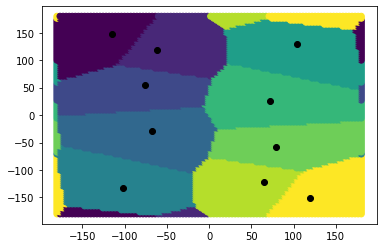

In [10]:
plt.scatter(reshaped[:, 0], reshaped[:, 1], c=cluster_assignment)
plt.scatter(centroids[:, 0], centroids[:, 1], c="black")

In [11]:
cluster_names = {
    "0": "B",
    "1": "Π",
    "2": "Γ",
    "3": "Λ",
    "4": "Z",
    "9": "β",
    "8": "π",
    "7": "γ",
    "6": "λ",
    "5": "ζ",
}

In [12]:
cluster_names[f"{8}"]

'π'